In [1]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-small
!unzip fashion-product-images-small.zip -d fashionSmall

Dataset URL: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small
License(s): MIT
fashion-product-images-small.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  fashion-product-images-small.zip
  inflating: fashionSmall/images/10000.jpg  
  inflating: fashionSmall/images/10001.jpg  
  inflating: fashionSmall/images/10002.jpg  
  inflating: fashionSmall/images/10003.jpg  
  inflating: fashionSmall/images/10004.jpg  
  inflating: fashionSmall/images/10005.jpg  
  inflating: fashionSmall/images/10006.jpg  
  inflating: fashionSmall/images/10007.jpg  
  inflating: fashionSmall/images/10008.jpg  
  inflating: fashionSmall/images/10009.jpg  
  inflating: fashionSmall/images/10010.jpg  
  inflating: fashionSmall/images/10011.jpg  
  inflating: fashionSmall/images/10012.jpg  
  inflating: fashionSmall/images/10013.jpg  
  inflating: fashionSmall/images/10014.jpg  
  inflating: fashionSmall/images/10015.jpg  
  inflating: fash

In [2]:
import pandas as pd
import os

curr_dir = os.getcwd()
df = pd.read_csv(curr_dir + "/fashionSmall/styles.csv", on_bad_lines="skip")
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

id gender masterCategory subCategory articleType baseColour  season  \
0  25954  Women    Accessories     Scarves     Scarves      Black  Summer   
1  41393    Men        Apparel     Topwear      Shirts     Purple  Summer   
2  13812    Men        Apparel     Topwear    Sweaters  Navy Blue    Fall   
3  59560  Women    Accessories   Jewellery      Bangle     Silver  Summer   
4  59280  Women    Accessories     Watches     Watches       Blue  Winter   

     year   usage                     productDisplayName      image  
0  2012.0  Casual              Femella Women Black Scarf  25954.jpg  
1  2012.0  Casual              Wrangler Men Purple Shirt  41393.jpg  
2  2011.0  Casual           Proline Navy Striped Sweater  13812.jpg  
3  2013.0  Casual                   Lucera Silver Bangle  59560.jpg  
4  2016.0  Casual  Titan Women Blue Dial Watch N9769SM01  59280.jpg

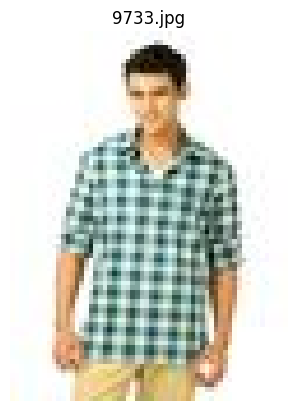

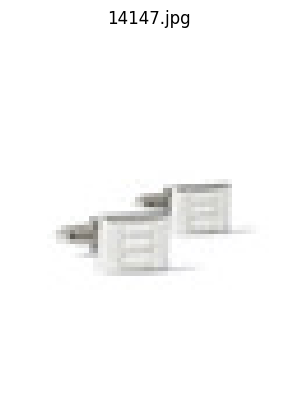

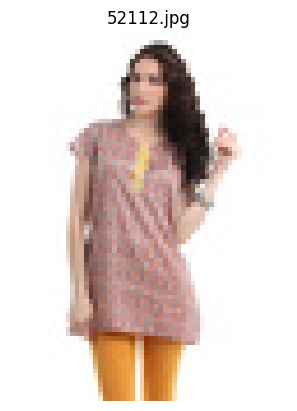

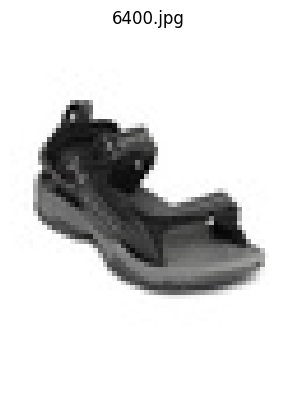

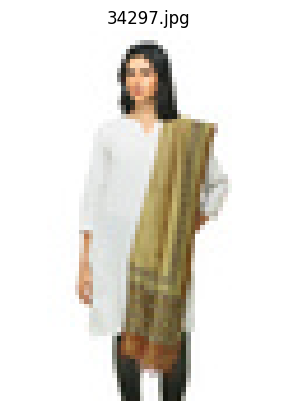

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt

image_folder = curr_dir + "/fashionSmall/images"
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

for img_file in image_files[:5]:
    img_path = os.path.join(image_folder, img_file)

    img = Image.open(img_path)

    plt.imshow(img)
    plt.title(img_file)
    plt.axis("off")
    plt.show()

In [4]:
# check image size
import os
from PIL import Image

image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]
img_path = os.path.join(image_folder, image_files[0])
img = Image.open(img_path)
img.size


(60, 80)

In [5]:
categorical_columns = ['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'usage']

for col in categorical_columns:
    print(f"\n{col} Value Counts:")
    print(df[col].value_counts())


gender Value Counts:
gender
Men       22147
Women     18631
Unisex     2161
Boys        830
Girls       655
Name: count, dtype: int64

masterCategory Value Counts:
masterCategory
Apparel           21397
Accessories       11274
Footwear           9219
Personal Care      2403
Free Items          105
Sporting Goods       25
Home                  1
Name: count, dtype: int64

subCategory Value Counts:
subCategory
Topwear                     15402
Shoes                        7343
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1079
Eyewear                      1073
Fragrance                    1011
Sandal                        963
Wallets                       933
Flip Flops                    913
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree    

<Figure size 1000x600 with 0 Axes>

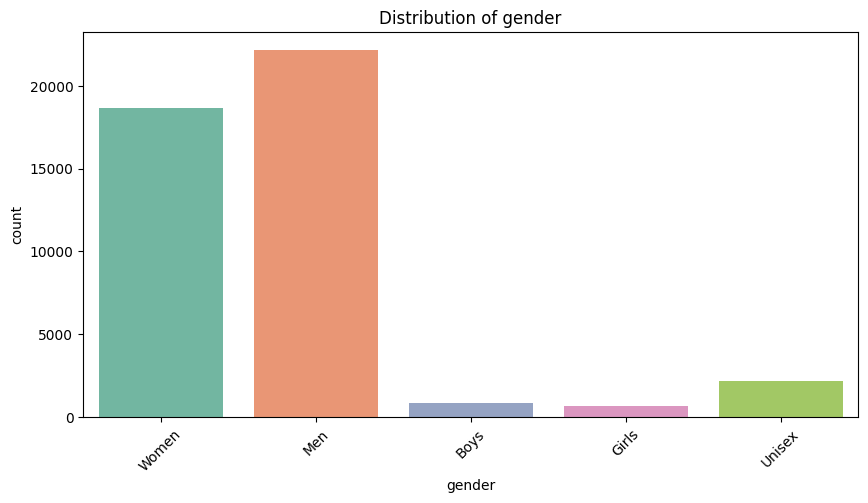

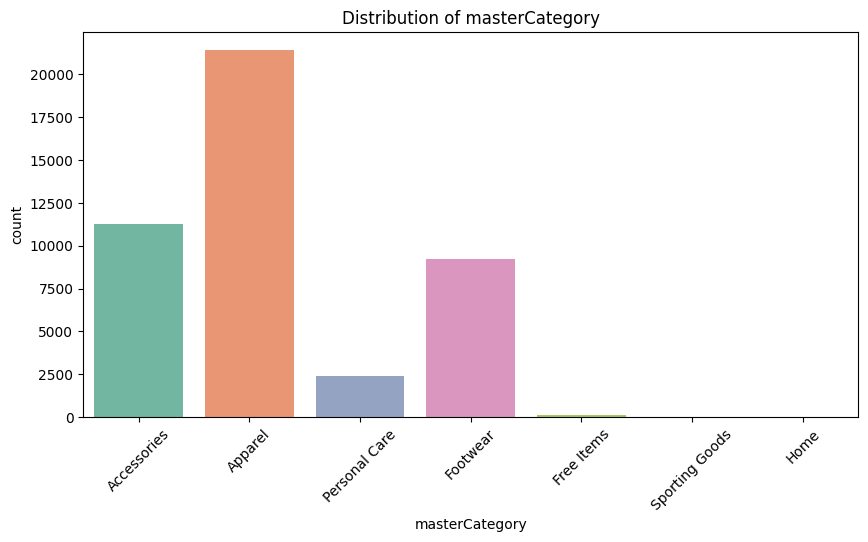

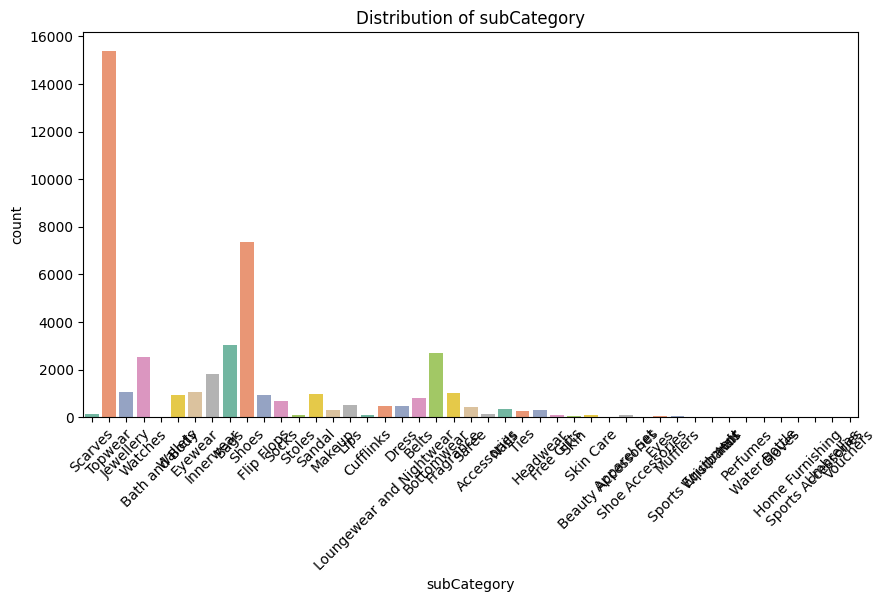

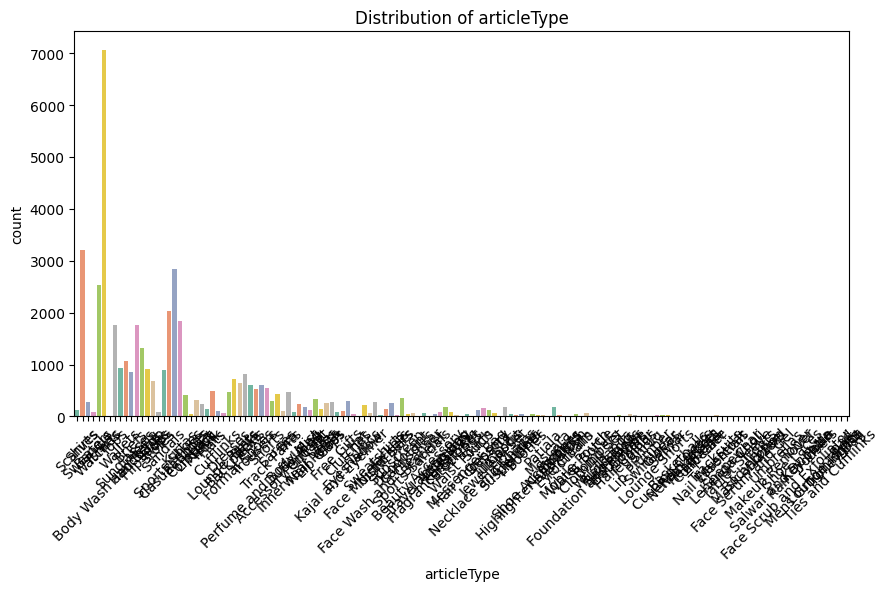

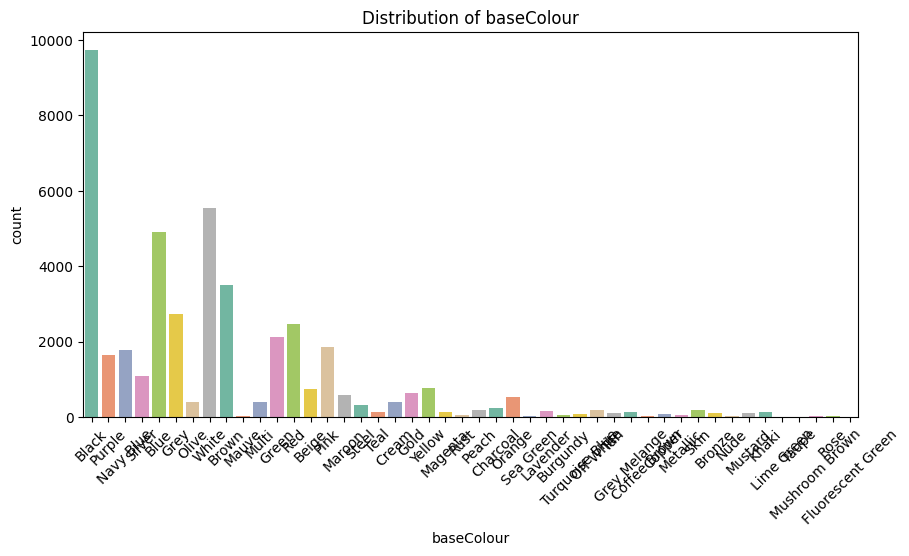

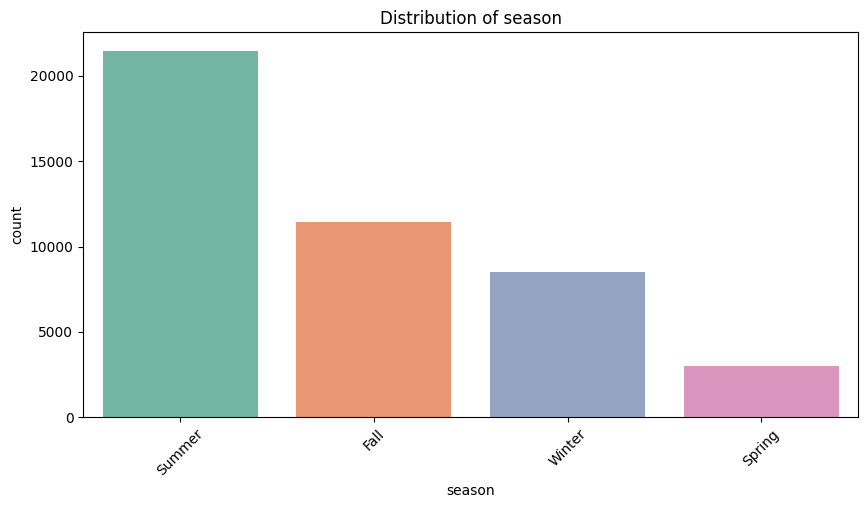

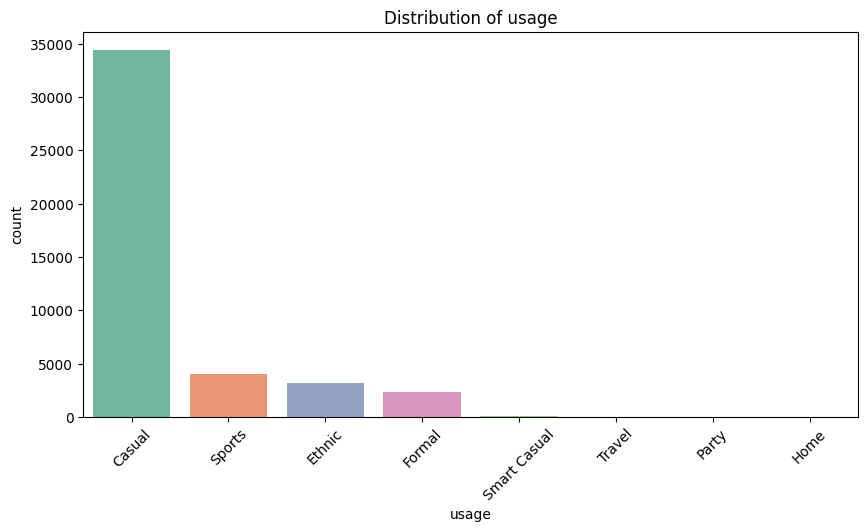

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

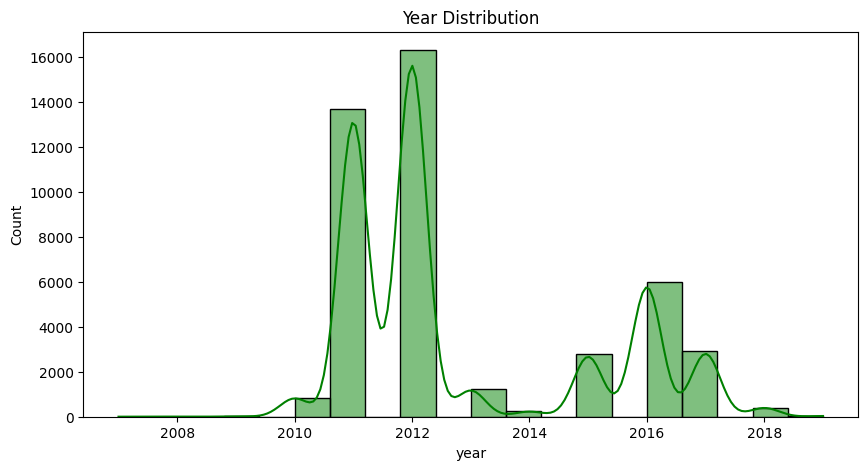

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df['year'], kde=True, color='green', bins=20)
plt.title("Year Distribution")
plt.show()

<Figure size 1200x600 with 0 Axes>

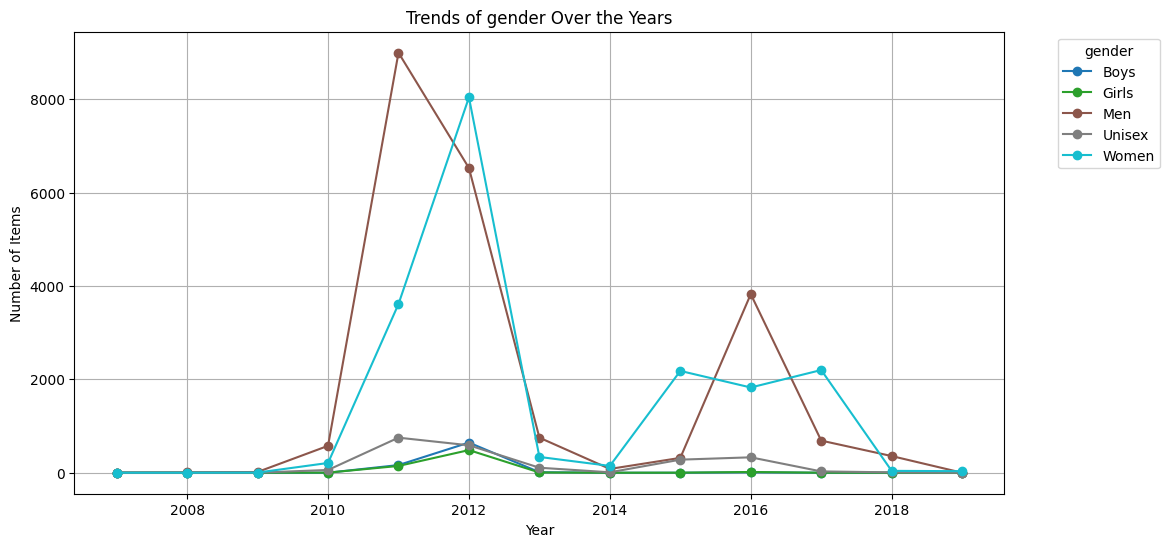

<Figure size 1200x600 with 0 Axes>

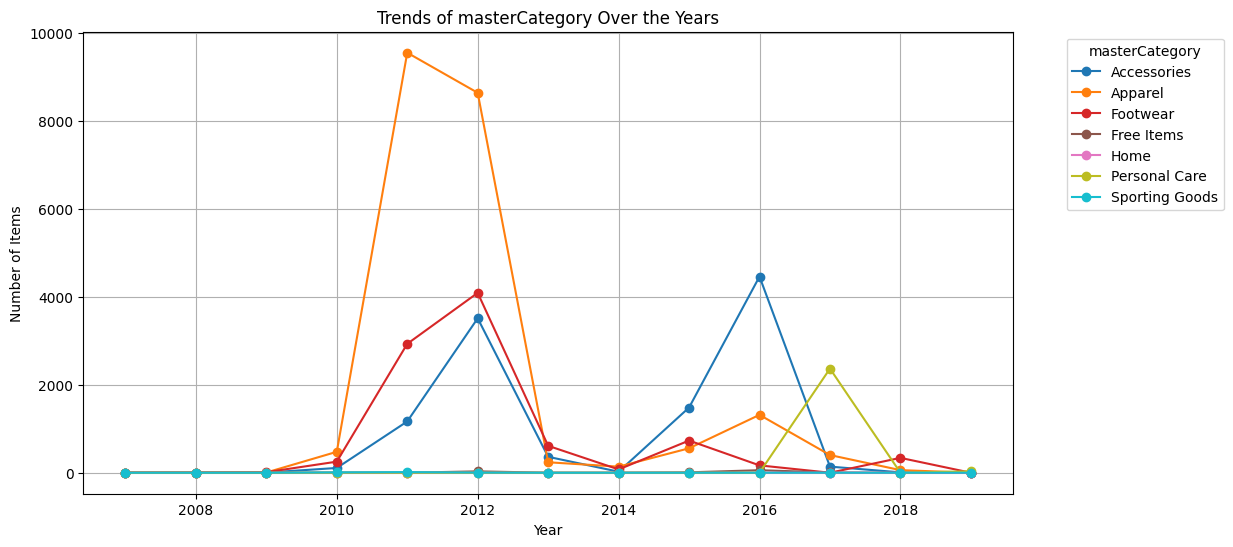

<Figure size 1200x600 with 0 Axes>

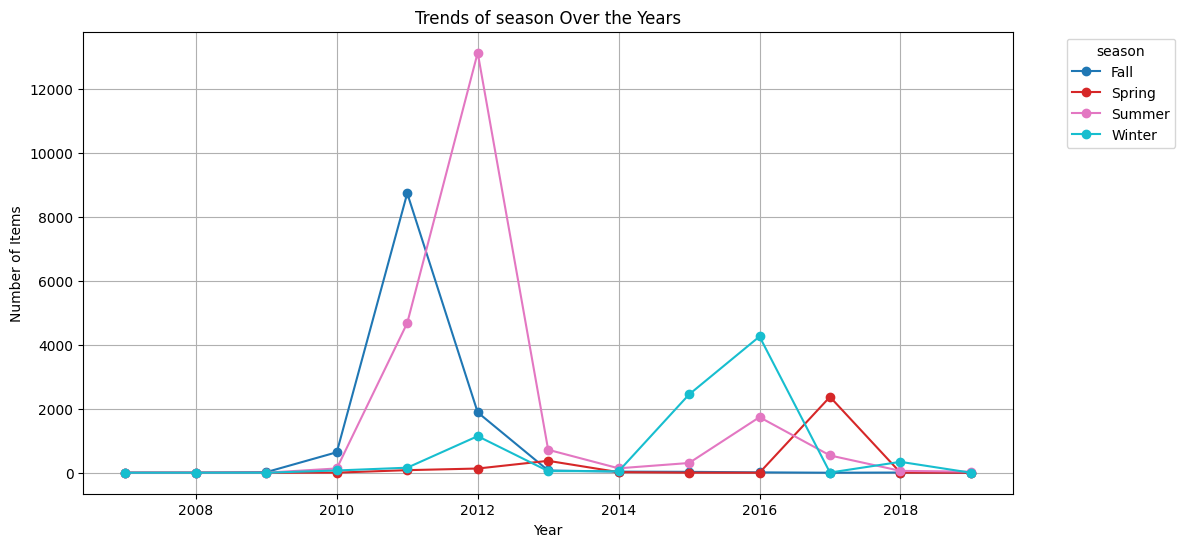

<Figure size 1200x600 with 0 Axes>

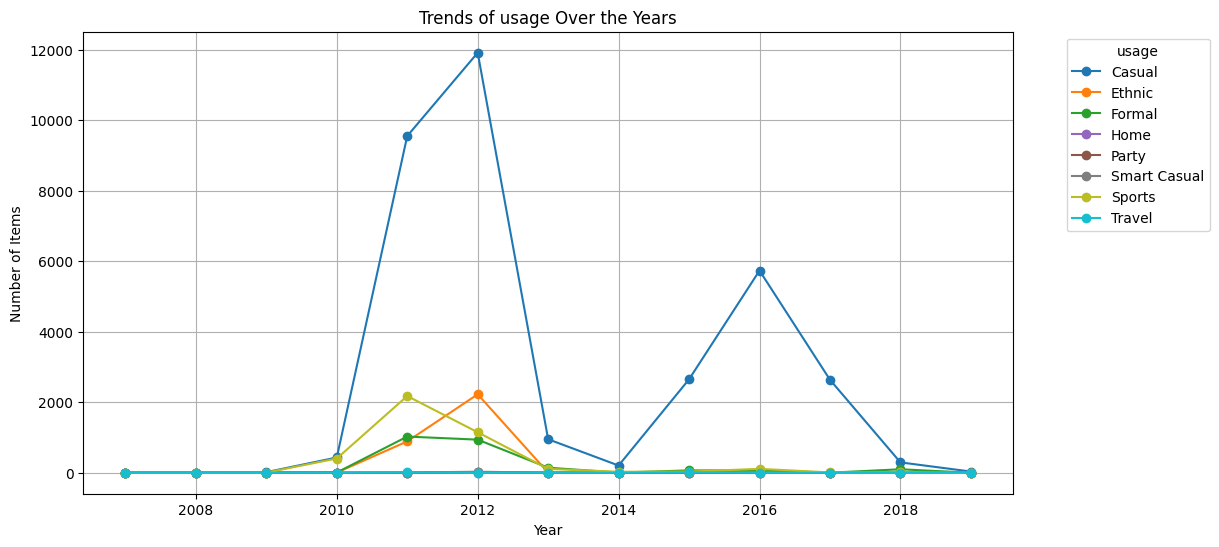

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_columns:
  if col != 'articleType' and col != 'baseColour' and col != 'subCategory':
    usage_trends = df.groupby(['year', col]).size().reset_index(name='count')

    usage_pivot = usage_trends.pivot(index='year', columns=col, values='count').fillna(0)
    plt.figure(figsize=(12, 6))
    usage_pivot.plot(kind='line', marker='o', figsize=(12, 6), colormap='tab10')
    plt.title(f"Trends of {col} Over the Years")
    plt.xlabel("Year")
    plt.ylabel("Number of Items")
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

In [9]:
from keras_preprocessing.image import ImageDataGenerator
import pandas as pd
import os
from sklearn.model_selection import train_test_split

# Get current directory
curr_dir = os.getcwd()

# Load dataset
df = pd.read_csv(curr_dir + "/fashionSmall/styles.csv", on_bad_lines="skip")

# Create image filename column
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)

# Shuffle dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split dataset (70% training, 30% temp)
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)

# Split temp_df into 15% validation and 15% testing
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Print dataset sizes
print(f"Training Set: {len(train_df)} samples")
print(f"Validation Set: {len(valid_df)} samples")
print(f"Testing Set: {len(test_df)} samples")

batch_size = 32
image_folder = curr_dir + "/fashionSmall/images"  

image_generator = ImageDataGenerator()

training_generator = image_generator.flow_from_dataframe(
    dataframe=train_df,
    directory=image_folder,
    x_col="image",
    y_col="subCategory",
    target_size=(96, 96),
    batch_size=batch_size,
    subset="training"
)

validation_generator = image_generator.flow_from_dataframe(
    dataframe=valid_df,
    directory=image_folder,
    x_col="image",
    y_col="subCategory",
    target_size=(96, 96),
    batch_size=batch_size,
    shuffle=True
)


test_generator = image_generator.flow_from_dataframe(
    dataframe=test_df,
    directory=image_folder,
    x_col="image",
    y_col="subCategory",
    target_size=(96, 96),
    batch_size=batch_size,
    shuffle=False  # No shuffling for test set
)

Training Set: 31096 samples
Validation Set: 6664 samples
Testing Set: 6664 samples
Found 31094 validated image filenames belonging to 44 classes.
Found 6664 validated image filenames belonging to 44 classes.
Found 6661 validated image filenames belonging to 38 classes.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 2 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 3 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
